<a href="https://colab.research.google.com/github/billy90834/DL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import os
# Ignore  the warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import random as rn
from sklearn.model_selection import train_test_split
import glob as gb
#imports 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator



In [2]:
#資料分類
#获取所有的图片路径名，存放到对应的列表中，同时贴上标签，存放到列表中。
x_ = list()
y = list()
IMG_SIZE = 128
##Daisy
for i in os.listdir("/content/drive/MyDrive/flowers/daisy"):
    try:
        path = "/content/drive/MyDrive/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
##Dandelion
for i in os.listdir("/content/drive/MyDrive/flowers/dandelion"):
    try:
        path = "/content/drive/MyDrive/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
##Rose
for i in os.listdir("/content/drive/MyDrive/flowers/rose"):
    try:
        path = "/content/drive/MyDrive/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
##Sunflower
for i in os.listdir("/content/drive/MyDrive/flowers/sunflower"):
    try:
        path = "/content/drive/MyDrive/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
##Tulip
for i in os.listdir("/content/drive/MyDrive/flowers/tulip"):
    try:
        path = "/content/drive/MyDrive/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)

In [3]:
# preprocessing data
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)  # y 值轉成 one-hot encoding,分類數=5

In [4]:
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

In [ ]:
x_train.shape,x_test.shape,x_val.shape

((3118, 128, 128, 3), (648, 128, 128, 3), (551, 128, 128, 3))

In [5]:
# image data augmentation 資料增強=>加強CNN辨識率
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

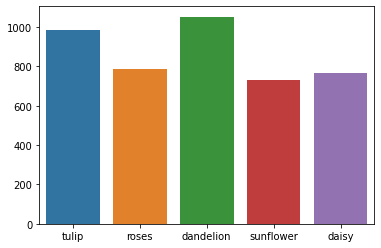

In [ ]:
#data可視化
sns.barplot(x=['tulip','roses','dandelion','sunflower','daisy'] , y=[len(os.listdir('/content/drive/MyDrive/flowers/tulip')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/rose')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/dandelion')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/sunflower')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/daisy'))])

In [6]:
##影像資料增補
data_augmentation = keras.Sequential([
    preprocessing.RandomZoom(0.1),
    preprocessing.RandomFlip(mode="horizontal"),
    preprocessing.RandomRotation(factor=0.1),
    
])

In [7]:
epoch = 50 # 定義訓練週期
batch_size = 32 # 定義梯度下降批量

In [36]:
# 建立的模型
model = keras.Sequential([
    # 第一層convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    # 找2*2裡最大
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 變成一維陣列
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax') # 使用 softmax activation function，將結果分類
])

In [37]:
# 輸出模型摘要資訊
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 14, 14, 128)     

In [38]:
#reduce the learnng rate
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001)
#definindo optimizador
optimizer = tf.keras.optimizers.Adam(epsilon=0.01,learning_rate=0.001)

In [39]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy'],
)

# 進行訓練, 訓練過程會存在 history 變數中
history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),
                        epochs= epoch,validation_data=(x_val,y_val),
                        steps_per_epoch=x_train.shape[0] // batch_size
                              )

Epoch 1/50
24/24 [==============================] - 16s 566ms/step - loss: 4.7571 - accuracy: 0.2816 - val_loss: 1.3448 - val_accuracy: 0.4265
Epoch 2/50
24/24 [==============================] - 13s 543ms/step - loss: 1.3379 - accuracy: 0.4057 - val_loss: 1.3128 - val_accuracy: 0.4918
Epoch 3/50
24/24 [==============================] - 13s 546ms/step - loss: 1.2688 - accuracy: 0.4753 - val_loss: 1.1656 - val_accuracy: 0.4918
Epoch 4/50
24/24 [==============================] - 13s 541ms/step - loss: 1.2029 - accuracy: 0.4983 - val_loss: 1.1380 - val_accuracy: 0.5517
Epoch 5/50
24/24 [==============================] - 13s 543ms/step - loss: 1.2075 - accuracy: 0.5077 - val_loss: 1.1175 - val_accuracy: 0.5390
Epoch 6/50
24/24 [==============================] - 13s 546ms/step - loss: 1.1778 - accuracy: 0.5187 - val_loss: 1.1181 - val_accuracy: 0.5318
Epoch 7/50
24/24 [==============================] - 13s 541ms/step - loss: 1.1122 - accuracy: 0.5462 - val_loss: 1.0311 - val_accuracy: 0.5898

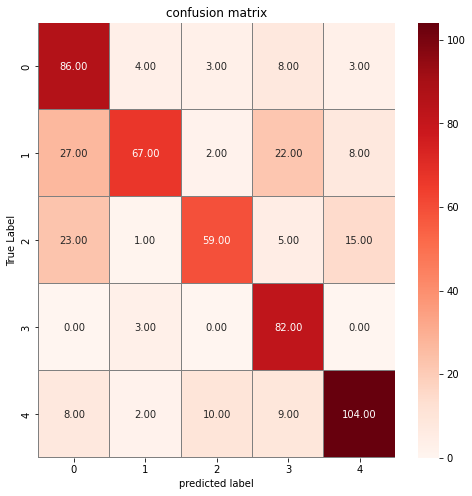

In [40]:
#confusion matrix
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [41]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas
print(classification_report(Y_true,Y_pred_classes))

21/21 [==============================] - 1s 31ms/step - loss: 0.8292 - accuracy: 0.7037
Test Accuracy: 70.37%
              precision    recall  f1-score   support

           0       0.60      0.83      0.69       104
           1       0.87      0.53      0.66       126
           2       0.80      0.57      0.67       103
           3       0.65      0.96      0.78        85
           4       0.80      0.78      0.79       133

    accuracy                           0.72       551
   macro avg       0.74      0.74      0.72       551
weighted avg       0.75      0.72      0.72       551



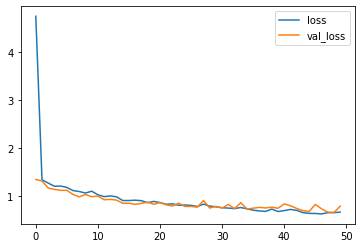

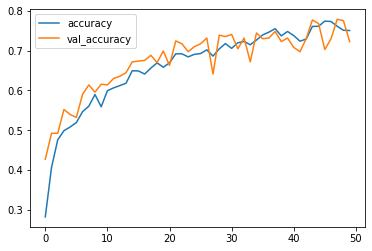

In [48]:
# Plot learning curves
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
